# KMeans Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

In [ ]:
home = fetch_california_housing()

selected_columns = ['Longitude', 'Latitude']
column_indices = [home.feature_names.index(col) for col in selected_columns]

data_features = home.data[:, column_indices]
feature_df = pd.DataFrame(data_features, columns=selected_columns)

data_target = home.target
target_df = pd.DataFrame(data_target, columns=['median_house_value'])

home_df = pd.concat([feature_df, target_df], axis=1)
home_df.head()

,Longitude,Latitude,median_house_value
0,-122.23,37.88,4.526
1,-122.22,37.86,3.585
2,-122.24,37.85,3.521
3,-122.25,37.85,3.413
4,-122.25,37.85,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

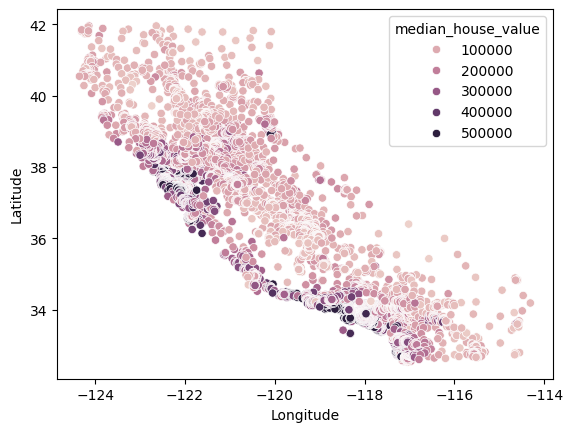

In [ ]:
home_df["median_house_value"] = home_df["median_house_value"] * 100000

sns.scatterplot(data=home_df, x="Longitude", y="Latitude", hue="median_house_value")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(home_df[["Longitude", "Latitude"]],
                                                    home_df[["median_house_value"]],
                                                    test_size=0.2, random_state=42)
X_train_norm = normalize(X_train)
X_test_norm  =normalize(X_test)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=1)

<Axes: xlabel='Longitude', ylabel='Latitude'>

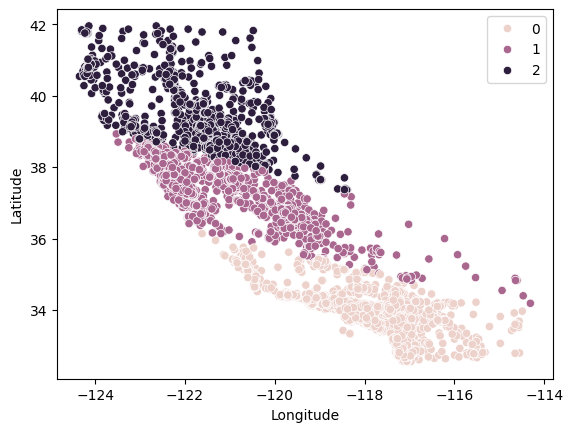

In [ ]:
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=kmeans.labels_)

<Axes: ylabel='median_house_value'>

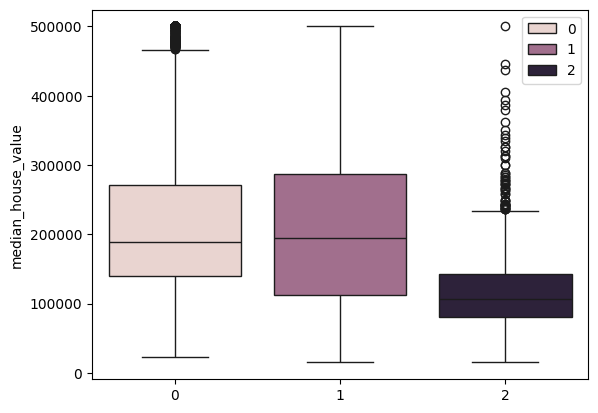

In [ ]:
sns.boxplot(x=kmeans.labels_, y=y_train['median_house_value'], hue=kmeans.labels_)

<Axes: xlabel='Longitude', ylabel='Latitude'>

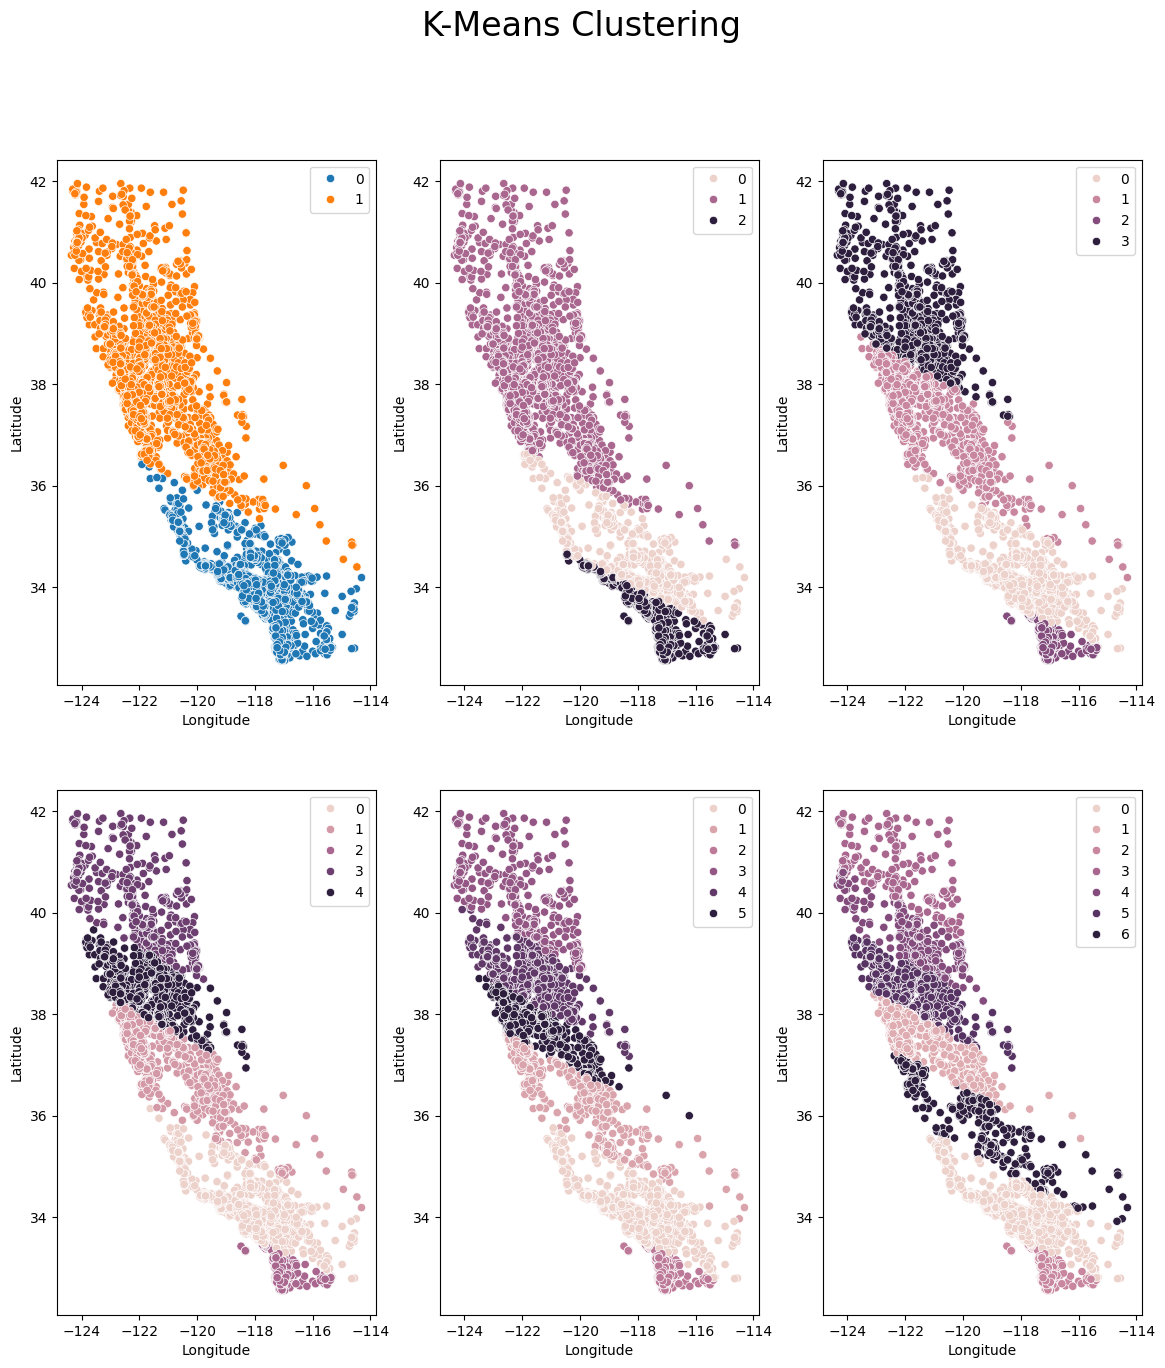

In [ ]:
k = range(2, 8)
fits = []


for k in k:
  model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train_norm)
  fits.append(model)

fig, axes = plt.subplots(2, 3, figsize=(14,15))
fig.suptitle('K-Means Clustering', fontsize=24)
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[0].labels_, ax=axes[0,0])
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[1].labels_, ax=axes[0,1])
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[2].labels_, ax=axes[0,2])
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[3].labels_, ax=axes[1,0])
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[4].labels_, ax=axes[1,1])
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=fits[5].labels_, ax=axes[1,2])

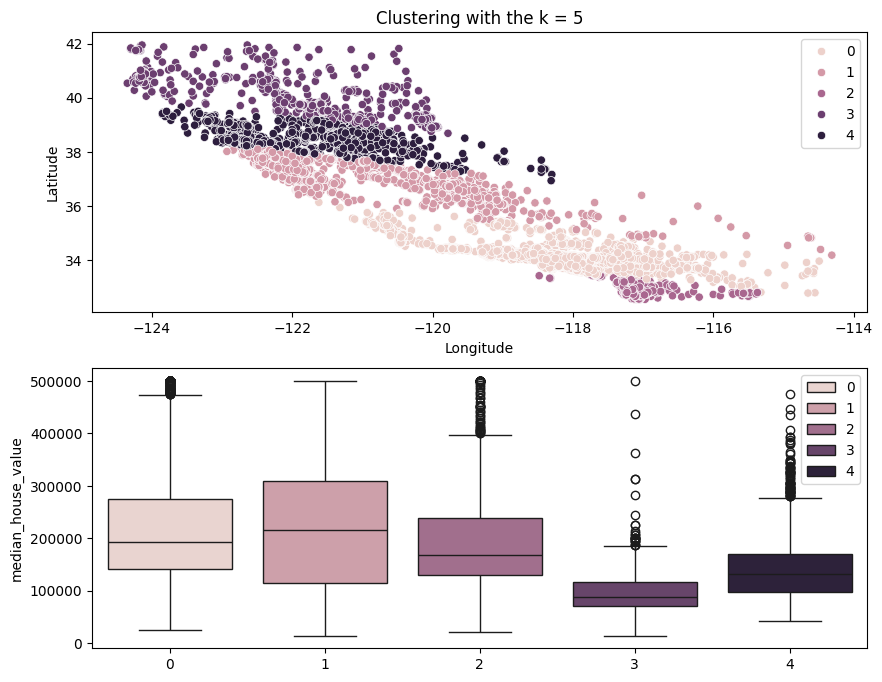

In [ ]:
model = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(X_train_norm)

fig, axes = plt.subplots(2, figsize=(10,8))
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue=model.labels_, ax=axes[0])
axes[0].set_title("Clustering with the k = 5")
sns.boxplot(x=model.labels_, y=y_train['median_house_value'], hue=model.labels_, ax=axes[1])
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('players_22.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'players_22.csv'

In [ ]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

df = df.dropna(subset=(features))
small_df = df[features]
small_df.head()

In [ ]:
small_df = ((small_df - small_df.min()) / (small_df.max() - small_df.min()))

In [ ]:
small_df.describe()

In [ ]:
def random_centroids(data, k):
  centroids = []

  for _ in range(k):
    centroid = small_df.apply(lambda x: float(x.sample()))
    centroids.append(centroid)

  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(small_df, 3)
centroids

In [ ]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt((data - x) ** 2).sum(axis=1))
  return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(small_df, centroids)

In [ ]:
labels.value_counts()

In [ ]:
def update_centroids(data, labels):
  centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
  return centroids

In [ ]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  D2_data = pca.fit_transform(data)
  D2_centroids = pca.transform(centroids)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  sns.scatterplot(x=D2_data[:, 0], y=D2_data[:, 1], c=labels)
  sns.scatterplot(x=D2_centroids[:, 0], y=D2_centroids[:, 1], color='red')
  plt.show()

In [ ]:
max_iteration = 100
centroid_count = 3

centroids = random_centroids(small_df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(small_df, centroids)
  centroids = update_centroids(small_df, labels)
  plot_clusters(small_df, labels, centroids.T, iteration)
  iteration += 1

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [ ]:
def compute_inertia(X, max_k=10):
  inertia_vals = []
  for k in range(1, max_k + 1):
    model = KMeans(n_clusters= k, random_state=42)
    model.fit(X)
    inertia_vals.append(model.inertia_)
  return inertia_vals

inertia_vals = compute_inertia(X, max_k=10)
plt.figure(figsize=(8, 5))
plt.plot(range(1,11), inertia_vals, marker='o', color='red')
plt.axvline(x=3, ls='--')
plt.title('Inertia (Elbow Method)', fontsize=18)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [ ]:
sil = []
max_k = 10

for k in range(2, max_k + 1):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  labels = model.labels_
  sil.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), sil, marker='o',color='green')
plt.title('Silhouette Score For Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(16,10))
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  q, mod = divmod(k, 2)
  visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick', ax=ax[q - 1][mod])
  visualizer.fit(X)

In [ ]:
from sklearn.metrics import davies_bouldin_score

def compute_db_index(X, max_k=10):
  db_vals = []

  for k in range(2, max_k + 1):
    model_ = KMeans(n_clusters=k, random_state=42)
    labels = model_.fit_predict(X)
    db_vals.append(davies_bouldin_score(X, labels))
  return db_vals

db_vals = compute_db_index(X, max_k=10)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), db_vals, marker='o', color='blue')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Index')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from IPython.display import Image

X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.3, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=30)
plt.title("True Clusters (Generated by make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
def animate_kmeans(centroids_history, labels, title, filename):
  fig, ax =plt.subplots(figsize=(8,6))
  scat = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=30)
  centroids_plot, = ax.plot([], [], 'kx', markersize=10, markeredgewidth=2)
  ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
  ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
  ax.set_title(title)

  def update(i):
    centroids = np.array(centroids_history[i])
    centroids_plot.set_data(centroids[:, 0], centroids[:, 1])
    return scat, centroids_plot

  ani = animation.FuncAnimation(fig, update, frames=len(centroids_history), interval=500, repeat=False)

  ani.save(filename, writer="imagemagick", fps=1)
  plt.close()

In [ ]:
def display_gif(filename):
  return Image(filename=filename)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.animation as animation

In [ ]:
random_state = 42
n_clusters = 3
max_iter = 10
np.random.seed(random_state)

In [ ]:
centroids = np.array(X[np.random.choice(X.shape[0], n_clusters, replace=False)])
centroids_history = [centroids.copy()]

for i in range(max_iter):
  labels = pairwise_distances_argmin(X, centroids)
  new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
  centroids_history.append(new_centroids)
  if np.all(centroids == new_centroids):
    print(f"Converged at {i} iteration")
    break
    centroids = new_centroids

animate_kmeans(centroids_history, labels, title="K-means with Random Initialization", filename="random_init.gif")
display(display_gif("random_init.gif"))

In [ ]:
centroids = [X[np.random.choice(X.shape[0])]]
for _ in range(1, n_clusters):
  distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
  probs = distances / distances.sum()
  next_centroid = X[np.random.choice(X.shape[0], p=probs)]
  centroids.append(next_centroid)

centroids = np.array(centroids)
centroids_history = [centroids.copy()]

for i in range(max_iter):
  labels = pairwise_distances_argmin(X, centroids)
  new_centroids = np.array([X[labels == c].mean(axis=0) for c in range(n_clusters)])
  centroids_history.append(new_centroids)
  if np.all(centroids == new_centroids):
    break
  centroids = new_centroids

animate_kmeans(centroids_history, labels, title="K-means with K-means++ Initialization", filename="kmeanspp_init.gif")

print("K-means++ Initialization Animation:")
display(display_gif("kmeanspp_init.gif"))

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 76.8MB/s]
(330, 500, 3)


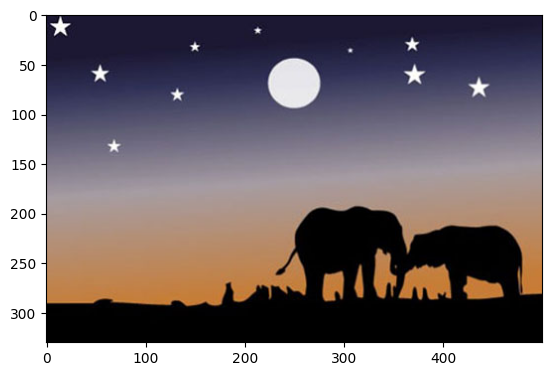

In [ ]:
import warnings
import cv2
warnings.filterwarnings("ignore")

!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

im = cv2.imread("./elephant.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape

print("="*80)
print(original_shape)
print("="*80)
plt.imshow(im)
plt.show()

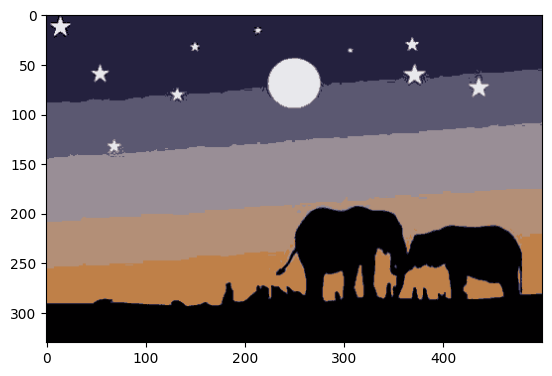

In [ ]:
all_pixels = im.reshape(-1, 3)

kmeans = KMeans(n_clusters=7)
kmeans.fit(all_pixels)

new_img = np.zeros((330*500, 3), dtype='uint8')

colors= kmeans.cluster_centers_
labels = kmeans.labels_

for ix in range(new_img.shape[0]):
  new_img[ix] = colors[labels[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop('CustomerID', axis=1, inplace=True)
df.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39


In [ ]:
df["Gender"] = df.Gender.map({'Male' : 0, 'Female' : 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

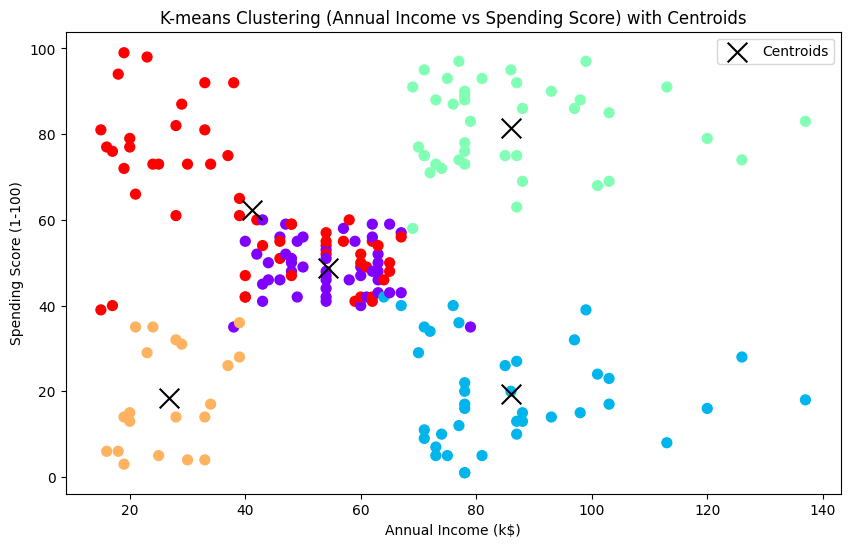

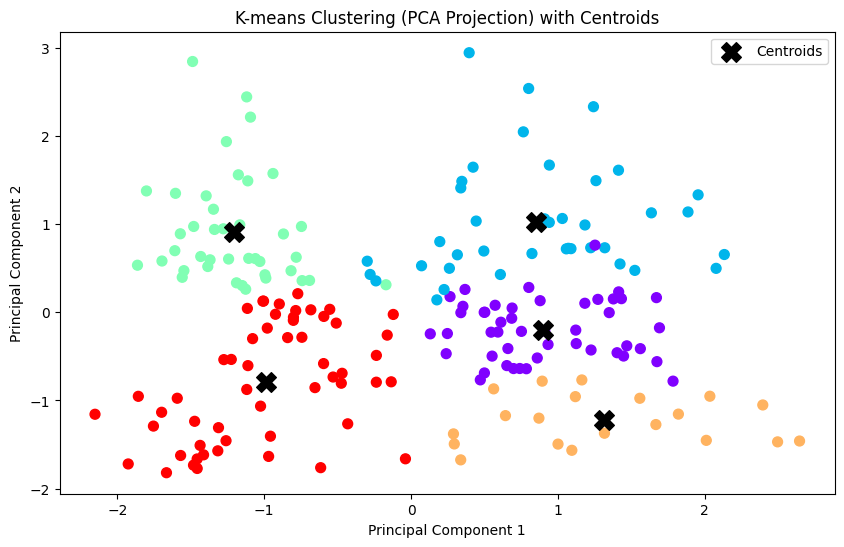

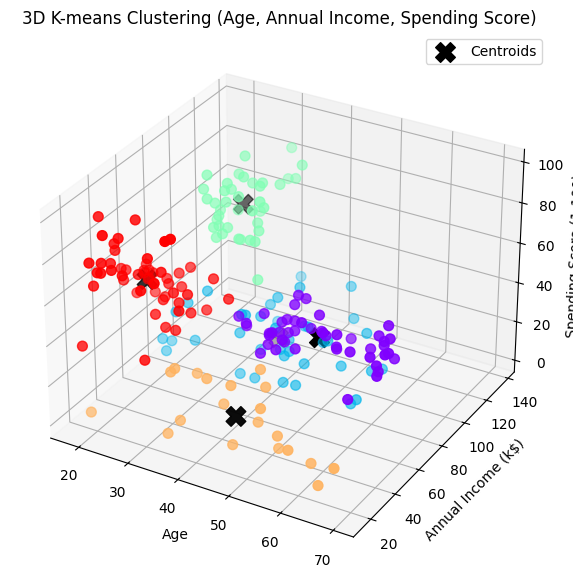

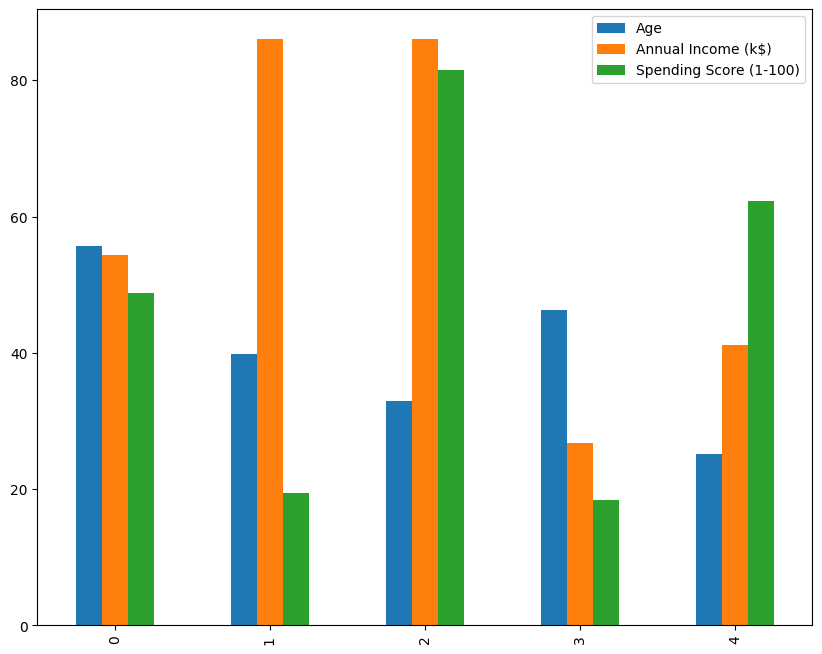

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)

df['Cluster'] = labels

plt.figure(figsize=(10,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels, cmap='rainbow', s=50)
plt.scatter(original_centroids[:, 1], original_centroids[:, 2], c='black', s=200, marker='x', label='Centroids')
plt.title("K-means Clustering (Annual Income vs Spending Score) with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("K-means Clustering (PCA Projection) with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels, cmap='rainbow', s=50)
ax.scatter(original_centroids[:, 0], original_centroids[:, 1], original_centroids[:, 2],
           c='black', s=200, marker='X', label='Centroids')
ax.set_title("3D K-means Clustering (Age, Annual Income, Spending Score)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.legend()
plt.show()


centroids_df = pd.DataFrame(original_centroids, columns=X.columns)
centroids_df.index = range(len(centroids_df))
centroids_df.plot(kind='bar', figsize=(10,8))
plt.show()

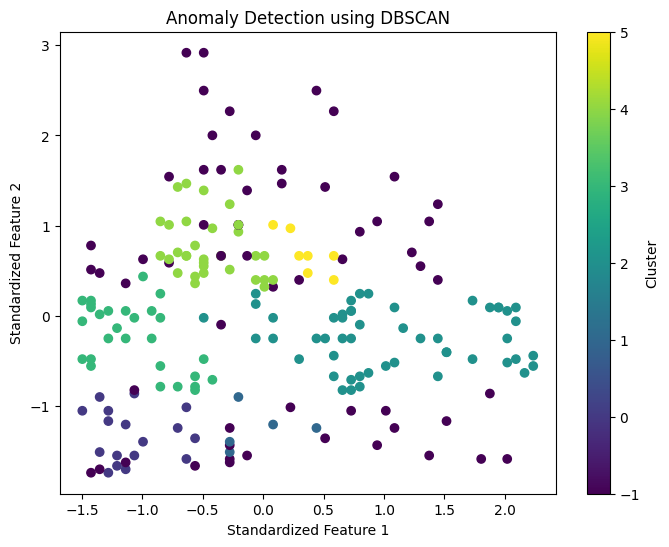

In [ ]:
from sklearn.cluster import DBSCAN

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_dbscan, cmap='viridis')
plt.title('Anomaly Detection using DBSCAN')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.colorbar(label='Cluster')
plt.show()


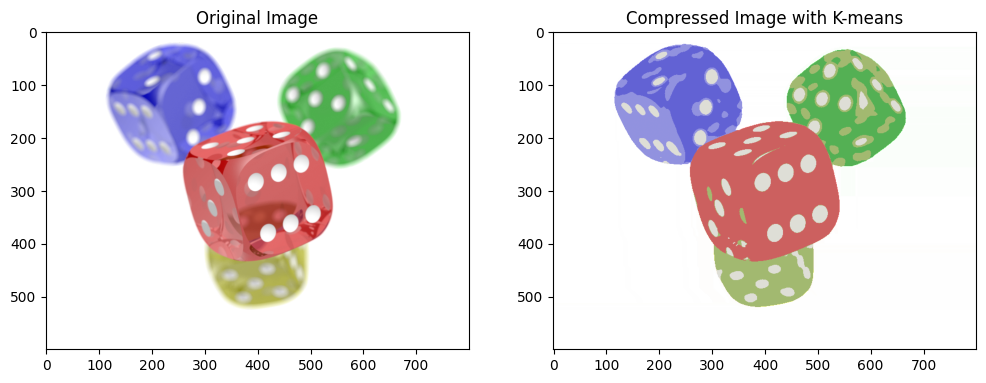

In [ ]:
from sklearn.utils import shuffle
from skimage import io

image = io.imread('https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png')
image = np.array(image, dtype=np.float64) / 255

w, h, d = image.shape
image_array = np.reshape(image, (w * h, d))

image_sample = shuffle(image_array, random_state=0)[:1000]

kmeans = KMeans(n_clusters=16, random_state=0).fit(image_sample)
labels = kmeans.predict(image_array)

compressed_image = kmeans.cluster_centers_[labels].reshape(w, h, d)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(compressed_image)
ax[1].set_title('Compressed Image with K-means')

plt.show()

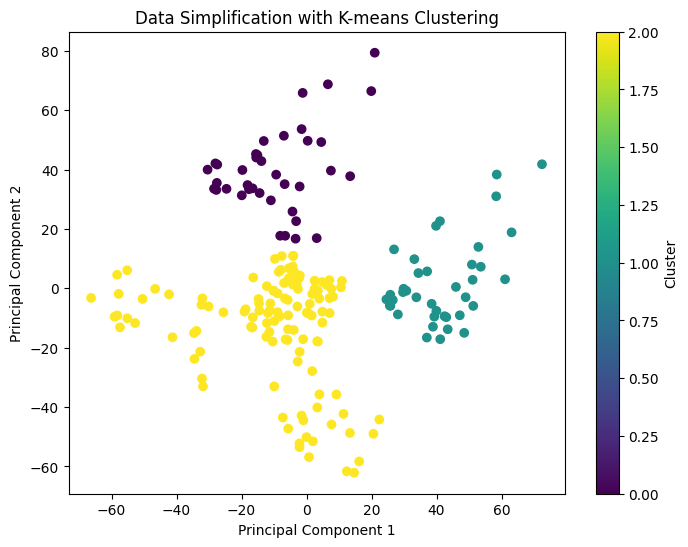

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Visualize the clustering using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Data Simplification with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


<ipython-input-55-4d1172a02672>:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)(labels)


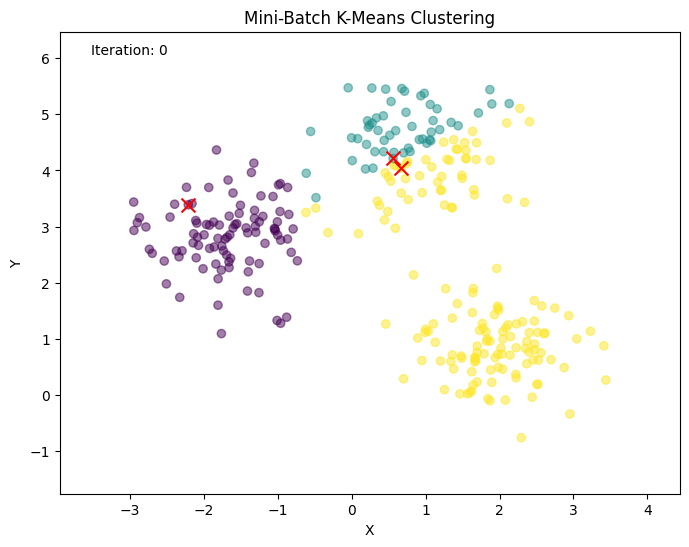

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sample data
n_samples = 300
n_clusters = 3
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.6, random_state=0)

# Mini-Batch K-Means implementation
def mini_batch_kmeans(X, K, batch_size, n_iterations, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    # Initialize centers randomly
    indices = np.random.choice(n_samples, K, replace=False)
    centers = X[indices].copy()
    counts = np.zeros(K)
    centers_list = [centers.copy()]

    # Iterate and update centers
    for _ in range(n_iterations):
        indices = np.random.choice(n_samples, batch_size, replace=True)
        X_batch = X[indices]
        distances = np.linalg.norm(X_batch[:, np.newaxis, :] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        for i in range(batch_size):
            j = labels[i]
            counts[j] += 1
            eta = 1 / counts[j]
            centers[j] = centers[j] + eta * (X_batch[i] - centers[j])
        centers_list.append(centers.copy())
    return centers_list

batch_size = 10
n_iterations = 100
centers_list = mini_batch_kmeans(X, n_clusters, batch_size, n_iterations)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)  # Data points
centers_init = centers_list[0]
centers_scatter = ax.scatter(centers_init[:, 0], centers_init[:, 1], c='red', marker='x', s=100)  # Centers
iter_text = ax.text(0.05, 0.95, 'Iteration: 0', transform=ax.transAxes)  # Iteration label

ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Mini-Batch K-Means Clustering')

# Animation update function
def update(frame):
    centers = centers_list[frame]
    # Assign points to nearest center
    distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    # Update point colors
    colors = plt.cm.get_cmap('viridis', n_clusters)(labels)
    scatter.set_facecolor(colors)  # Key: Correct method to update colors
    # Update center positions
    centers_scatter.set_offsets(centers)
    # Update text
    iter_text.set_text(f'Iteration: {frame}')
    return scatter, centers_scatter, iter_text

# Create and display animation
ani = FuncAnimation(fig, update, frames=len(centers_list), interval=200, blit=True)
plt.show()